In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

c:\deeplearning\python3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [3]:
tf.keras.__version__

'2.1.2-tf'

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
print("size of : ")
print("-training_set: \t\t{}".format(len(data.train.labels)))
print("-test_set: \t\t{}".format(len(data.test.labels)))
print("-validation-set: \t{}".format(len(data.validation.labels)))

size of : 
-training_set: 		55000
-test_set: 		10000
-validation-set: 	5000


In [6]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [7]:
#we know that MNIST images are 28 pixels in each dimension
img_size = 28

#image are stored in one_dimensional arrays of this length
img_size_flat = img_size * img_size

#Tuple with height and width if images used to reshape arrays.
#This is used for plotting the images.
img_shape = (img_size, img_size)

#Tuple with height and width if images used to reshape arrays.
#This is used for plotting the images.
img_shape_full = (img_size, img_size, 1)


#number of colour channels for the images: 1 channel for gray-scale
num_channels = 1

#number of classes, 
num_classes = 10

In [8]:
#Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    #Create figure with  3X3 sub_plots
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        #Plot images
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        if cls_pred is None:
            xlabel = "True:{0}".format(cls_true[i])
        else:
            xlabel = "True:{0}, Pred:{1}".format(cls_true[i], cls_pred[i])
            
        #Show the classes as the label on the x-axis
        ax.set_xlabel([xlabel])
        
        #Remove ticks from the plot
        ax.set_xticks([])
        ax.set_yticks([])
        
    #Ensure the plot is show correctly with multiple plots
    #in a single Notebook cell
    plt.show()
        

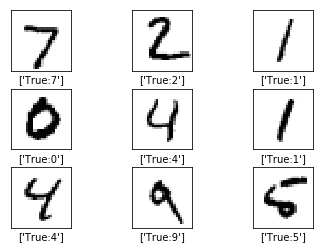

In [9]:
#Get the first images from the test-set.
images = data.test.images[0:9]

#Get the true classes for those images
cls_true = data.test.cls[0:9]

#Plot the image and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)


In [10]:
#Function for plotting examples of images from the test-set that have been mis-classified.
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [11]:
if False:
    x_pretty = pt.wrap(x_image)
    
    with pt.defaults_scope(activation_fn=tf.nn.relu):
        y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)

In [12]:
#Sequential model
#Start construction of the Keras Sequential model.
model = Sequential()

In [13]:
# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(img_size_flat,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape(img_shape_full))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())

# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(num_classes, activation='softmax'))

In [14]:
#Model Compilation
from tensorflow.python.keras.optimizers import Adam

optimizer = Adam(lr=1e-3)

In [15]:
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
#Training 
model.fit(x=data.train.images, y=data.train.labels, epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================]55000/55000 [==============================] - 8s 155us/step - loss: 0.2103 - acc: 0.9394



In [17]:
result = model.evaluate(x=data.test.images, y =data.test.labels)

10000/10000 [==============================]10000/10000 [==============================] - 1s 89us/step



In [18]:
#Printing all the performance metrics for the test-set
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.06178274546246976
acc 0.9808


In [19]:
print("{0}:{1:.2%}".format(model.metrics_names[1], result[1]))

acc:98.08%


In [20]:
#Predicting the classification for new images
images = data.test.images[0:9]

cls_true = data.test.cls[0:9]

y_pred = model.predict(x=images)

In [21]:
#Get the predicted classes as integers.
cls_pred = np.argmax(y_pred, axis=1)

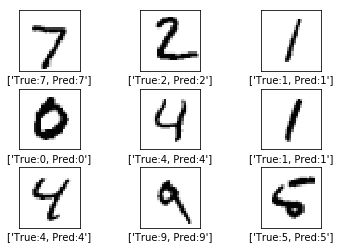

In [22]:
plot_images(images=images,
           cls_true=cls_true,
           cls_pred=cls_pred)

In [23]:
#Plot some examples of mis-classified images from the test-set.
y_pred = model.predict(x=data.test.images)

In [24]:
cls_pred = np.argmax(y_pred, axis=1)

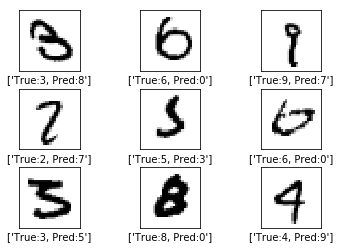

In [25]:
plot_example_errors(cls_pred)

In [26]:
#Function model

In [27]:
# Create an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
inputs = Input(shape=(img_size_flat,))

# Variable used for building the Neural Network.
net = inputs

# The input is an image as a flattened array with 784 elements.
# But the convolutional layers expect images with shape (28, 28, 1)
net = Reshape(img_shape_full)(net)

# First convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Second convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Flatten the output of the conv-layer from 4-dim to 2-dim.
net = Flatten()(net)

# First fully-connected / dense layer with ReLU-activation.
net = Dense(128, activation='relu')(net)

# Last fully-connected / dense layer with softmax-activation
# so it can be used for classification.
net = Dense(num_classes, activation='softmax')(net)

# Output of the Neural Network.
outputs = net

In [30]:
from tensorflow.python.keras.models import Model

In [31]:
model2 = Model(inputs=inputs, outputs=outputs)

In [36]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Training
model2.fit(x=data.train.images, y=data.train.labels, epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================]55000/55000 [==============================] - 7s 119us/step - loss: 0.1971 - acc: 0.9379



In [39]:
#Evaluation
result = model2.evaluate(x=data.test.images, y=data.test.labels)

10000/10000 [==============================]10000/10000 [==============================] - 1s 100us/step



In [40]:
#Printing all the performance metrics for the test-set
for name, value in zip(model2.metrics_names, result):
    print(name, value)

loss 0.049705593425454574
acc 0.9826


In [41]:
print("{0}: {1:.2%}".format(model2.metrics_names[1], result[1]))

acc: 98.26%


In [42]:
#Plotting some examples of mis-classified images from the test-set.

y_pred = model2.predict(x=data.test.images)

In [43]:
cls_pred = np.argmax(y_pred, axis=1)

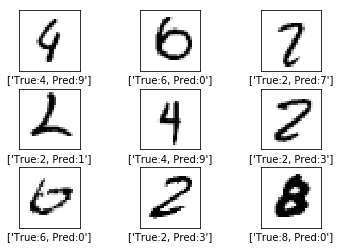

In [44]:
plot_example_errors(cls_pred)

In [48]:
#Save&Load model
path_model = 'model.keras'

In [49]:
model2.save(path_model)

In [50]:
del model2

In [51]:
from tensorflow.python.keras.models import load_model

In [52]:
model3 = load_model(path_model)

In [53]:
images = data.test.images[0:9]

In [55]:
y_pred = model3.predict(x=images)

In [56]:
cls_pred = np.argmax(y_pred, axis=1)

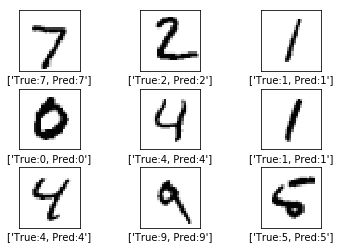

In [57]:
plot_images(images=images, cls_pred=cls_pred, cls_true=cls_true)

In [58]:
#Visualization of Layer Weights and Outputs

In [59]:
#Helper-function for plotting convolutional weights
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [60]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
__________

In [61]:
layer_input = model3.layers[0]

In [62]:
layer_conv1 = model3.layers[2]

In [63]:
layer_conv1

In [64]:
layer_conv2 = model3.layers[4]

In [65]:
weights_conv1 = layer_conv1.get_weights()[0]

In [66]:
weights_conv1.shape

(5, 5, 1, 16)

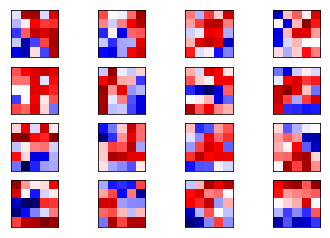

In [67]:
plot_conv_weights(weights=weights_conv1, input_channel=0)

In [68]:
weights_conv2 = layer_conv2.get_weights()[0]

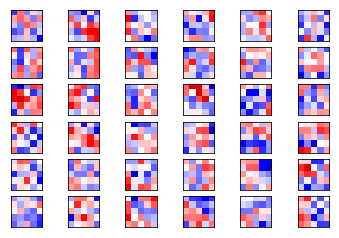

In [69]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

In [70]:
#Helper-function for plotting the output of a convolutional layer

def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [71]:
#Helper-function for plotting a single image.
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

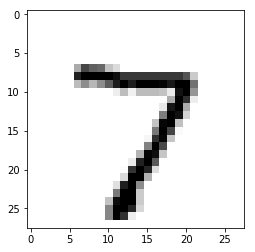

In [72]:
image1 = data.test.images[0]
plot_image(image1)

In [73]:
#Output of Convolutional Layer - Method 1
from tensorflow.python.keras import backend as K

In [74]:
output_conv1 = K.function(inputs=[layer_input.input], outputs=[layer_conv1.output])

In [76]:
layer_output1 = output_conv1([[image1]])[0]
layer_output1.shape

(1, 28, 28, 16)

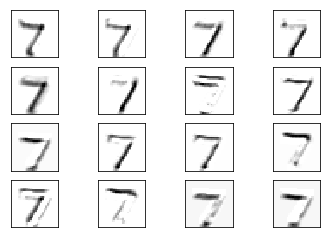

In [77]:
plot_conv_output(values=layer_output1)

In [78]:
#Output of Convolutional Layer - Method 2
output_conv2 = Model(inputs=layer_input.input, outputs=layer_conv2.output)

In [79]:
layer_output2 = output_conv2.predict(np.array([image1]))
layer_output2.shape

(1, 14, 14, 36)

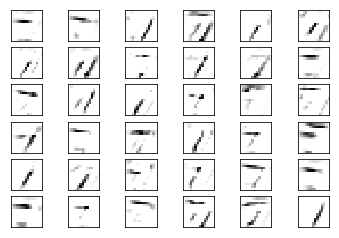

In [80]:
plot_conv_output(values=layer_output2)